In [1]:
import librosa
from librosa import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob


In [2]:
def audioFileFunc(folderName,y_TestTrain,fName):
    Files = glob.glob(folderName)
    featureList = []
    for i in range(len(Files)):
        x,sr = librosa.load(Files[i])
        #features mean
        MeanMfcc = np.mean(librosa.feature.mfcc(y=x,sr=sr,n_mfcc=47),axis=1)
                
        MeanMelSpectrum = np.mean(librosa.feature.melspectrogram(y=x,sr=sr),axis=1)
        
        MeanChroma = np.mean(librosa.feature.chroma_stft(x, sr=sr),axis=1)

        S = np.abs(librosa.stft(x))
        MeanContrast = np.mean(librosa.feature.spectral_contrast(S=S, sr=sr),axis=1)
        #labels appending
        y_TestTrain.append(fName)
        #feature
        featureList.append(np.hstack((MeanMfcc,MeanMelSpectrum,MeanChroma,
                                    MeanContrast)))
        
    return featureList

## Reading Files

In [3]:
Y_Train = []

temp = []
temp = audioFileFunc('./SERDataset/Train/Neutral/*.wav',Y_Train,"Neutral")
X_Train = pd.DataFrame(temp)
temp = pd.DataFrame(audioFileFunc('./SERDataset/Train/Happy/*.wav',Y_Train,"Happy"))
X_Train = X_Train.append(temp)
temp = pd.DataFrame(audioFileFunc('./SERDataset/Train/Sad/*.wav',Y_Train,"Sad"))
X_Train = X_Train.append(temp)
temp = pd.DataFrame(audioFileFunc('./SERDataset/Train/Angry/*.wav',Y_Train,"Angry"))
X_Train = X_Train.append(temp)


In [4]:
Y_Test = []

temp = []
temp = audioFileFunc('./SERDataset/Test/Neutral/*.wav',Y_Test,"Neutral")
X_Test = pd.DataFrame(temp)
temp = pd.DataFrame(audioFileFunc('./SERDataset/Test/Happy/*.wav',Y_Test,"Happy"))
X_Test = X_Test.append(temp)
temp = pd.DataFrame(audioFileFunc('./SERDataset/Test/Sad/*.wav',Y_Test,"Sad"))
X_Test = X_Test.append(temp)
temp = pd.DataFrame(audioFileFunc('./SERDataset/Test/Angry/*.wav',Y_Test,"Angry"))
X_Test = X_Test.append(temp)


In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Y_Train= (label_encoder.fit_transform(Y_Train))
Y_Test= (label_encoder.fit_transform(Y_Test))
print('X_Train shape:',X_Train.shape)
print('Y_Train shape:',Y_Train.shape)
print('X_Test shape:',X_Test.shape)
print('Y_Test shape:',Y_Test.shape)

X_Train shape: (385, 194)
Y_Train shape: (385,)
X_Test shape: (60, 194)
Y_Test shape: (60,)


## Data Visualization

In [6]:
Xdata = []
hlf1 = []
hlf2 = []
labels= []
for i in range(len(X_Train)):
    hlf1.append(np.mean(X_Train.values[i][:97]))
    hlf2.append(np.mean(X_Train.values[i][97:]))
    labels.append(Y_Train[i])
for i in range(len(X_Test)):
    hlf1.append(np.mean(X_Test.values[i][:97]))
    hlf2.append(np.mean(X_Test.values[i][97:]))
    labels.append(Y_Test[i])
hlf1=np.array(hlf1)
hlf2=np.array(hlf2)
labels=np.array(labels)
newLabels = []
for i in range(len(labels)):
    newLabels.append('')
for i in range(len(labels)):
    if labels[i]==0:
        newLabels[i]='Angry'
    if labels[i]==1:
        newLabels[i]='Happy'
    if labels[i]==2:
        newLabels[i]='Neutral'
    if labels[i]==3:
        newLabels[i]='Sad'

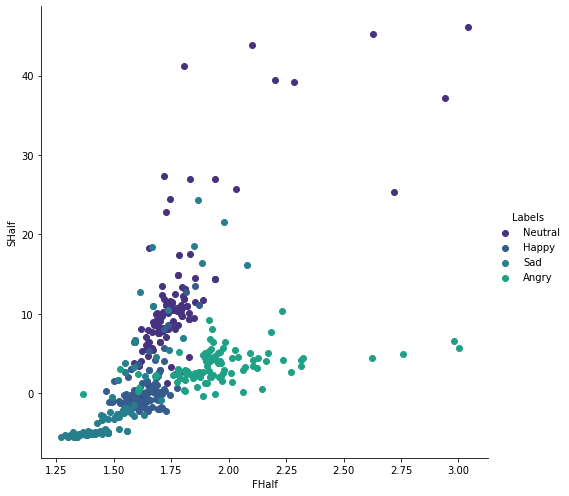

In [7]:
import seaborn as sns
data = { 'SHalf':hlf1,'FHalf':hlf2,'Labels':newLabels}
df = pd.DataFrame(data=data)
sns.set_palette("viridis")
sns.FacetGrid(df,hue='Labels',height=7).map(plt.scatter,
                              'FHalf',
                              'SHalf').add_legend()
plt.savefig('191874.png')
plt.show()


## Prediction

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


svc = SVC(kernel='linear',gamma=0.001,C=1)
svc.fit(X_Train, Y_Train)
prediction_Model = svc.predict(X_Test)


In [9]:
print('Confusion Matrix')
print(confusion_matrix(Y_Test,prediction_Model))
print('Classification Report')
print(classification_report(Y_Test,prediction_Model))

Confusion Matrix
[[15  0  0  0]
 [ 0 15  0  0]
 [ 0  0 15  0]
 [ 0  0  0 15]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [10]:
print("Accuracy:",str(round(metrics.accuracy_score(Y_Test, prediction_Model),3)*100)+'%')


Accuracy: 100.0%


In [11]:
## Saving model

import joblib
filename = 'i19874_Saved.sav'
joblib.dump(prediction_Model, filename)


['i19874_Saved.sav']

In [12]:
loaded_model = joblib.load(filename)
print(classification_report(Y_Test,loaded_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



## Predict file

In [13]:
def predict(File):
    featureList = []
    x,sr = librosa.load(File)
    #features mean
    MeanMfcc = np.mean(librosa.feature.mfcc(y=x,sr=sr,n_mfcc=47),axis=1)

    MeanMelSpectrum = np.mean(librosa.feature.melspectrogram(y=x,sr=sr),axis=1)

    MeanChroma = np.mean(librosa.feature.chroma_stft(x, sr=sr),axis=1)

    S = np.abs(librosa.stft(x))
    MeanContrast = np.mean(librosa.feature.spectral_contrast(S=S, sr=sr),axis=1)
    #feature
    featureList.append(np.hstack((MeanMfcc,MeanMelSpectrum,MeanChroma,
                                MeanContrast)))
    
    featureList = pd.DataFrame(featureList)
    
    Dict ={'Sad':'3','Angry':'0','Happy':'1','Neutral':'2'}
    Dict = {v: k for k, v in Dict.items()}    
    predict = svc.predict(featureList)
    
    return Dict[str(predict[0])]

In [14]:
print('Audio is:',predict('./SERDataset/Train/Sad/SM25_F34_S084.wav'))

Audio is: Sad


In [15]:
print('Audio is:',predict('./SERDataset/Test/Happy/SM7_F22_H094.wav'))

Audio is: Happy
